In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv("Iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.shape

(150, 5)

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
x = data.iloc[:,:3]
y = data.iloc[:,4]
print(x)
print(y)

     sepal_length  sepal_width  petal_length
0             5.1          3.5           1.4
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[150 rows x 3 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


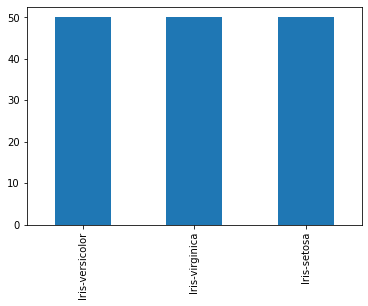

In [18]:
#checking data balance
check = data["species"].value_counts().plot(kind = "bar")
plt.show()

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42, stratify = y)

In [22]:
#function to train the model using KNN classisifer
def trainKNN(x_train,y_train,k):
    classifier = KNeighborsClassifier(n_neighbors=k , n_jobs = -1)
    classifier.fit(x_train,y_train)
    return classifier

In [23]:
def predictClassifier(x_test,classifier):
    y_pred = classifier.predict(x_test)
    return y_pred

In [24]:
def calculateAccuracy(y_pred,y_test):
    accuracy = accuracy_score(y_pred,y_test)
    return accuracy

In [30]:
kvalues = [x for x in range(1,50,6)]
AccuracyList = []
for k in tqdm(kvalues):
    KnnClassifier = trainKNN(x_train,y_train,k)
    y_pred = predictClassifier(x_test,KnnClassifier)
    acc = calculateAccuracy(y_pred,y_test)
    AccuracyList.append(acc)

100%|██████████| 9/9 [00:00<00:00, 34.94it/s]


In [32]:
print(AccuracyList)

[0.9111111111111111, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111]


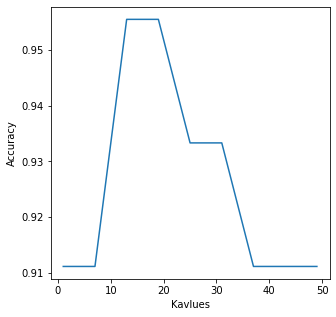

In [33]:
f = plt.figure(figsize = (5,5))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel("Kavlues")
ax.set_ylabel("Accuracy")
plt.show()